In [4]:
import ROOT
import os

Welcome to JupyROOT 6.28/06


In [5]:
rootFile = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/test_zb_input/pps-test-re-tracking-efficiency/368454/outputTrackingEfficiency_run368454.root'
outputFolder = 'plots/'
if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

plotPubStatus = 'Internal'

In [6]:
def getPlot(filename,sector,station,hist_pattern):
    """Get the track hit distribution from the DQM file"""
    file = ROOT.TFile(filename)
    arm = 0 if sector == '45' else 1
    hist_path = hist_pattern.format(
        sector=sector,
        station=station,
        arm=arm
    )
    
    if not file:
        print(f'Failed to open file: {filename}')
        file.Close()
        return None
    
    h = file.Get(hist_path)
    if not h:
        print(f'Failed to retrieve histogram: {hist_path}')
        file.Close()
        return None
    
    # Create a copy of the histogram
    hist_class = h.Class().GetName()
    if hist_class == 'TH1D':
        hist = ROOT.TH1D(h)
    elif hist_class == 'TH2D':
        hist = ROOT.TH2D(h)
    else:
        print(f'Found histogram of non-supported class: {hist_class}')
        file.Close()
        return None
        
    # Pass the ownership to the top-level application
    hist.SetDirectory(0)
    
    return hist

In [22]:
def makeRadiationEfficiencyPlot(rootFile,sector,station,save_output=False):
    track_distribution_pattern = 'DQMData/Run 999999/Run summary/h2RefinedTrackEfficiency_arm{arm}_st{station}_rp3'
    hist = getPlot(rootFile,sector,station,track_distribution_pattern)
    
    st_m = '220' if station == '2' else '210'

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(1)

    canvas = ROOT.TCanvas('c'+hist.GetName(),'c'+hist.GetName(),104*6,160*4) # Canvas sized to make the pixel proportions right
    hist.SetDirectory(ROOT.gDirectory)
    hist.SetMinimum(0)
    canvas.SetRightMargin(0.125)
    
    hist.GetXaxis().SetRangeUser(1,19)
    hist.GetYaxis().SetRangeUser(-10,14)
    hist.GetXaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleOffset(1)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetYaxis().SetTitleOffset(1)

    hist.DrawClone("colz")

    # Add CMS Watermark
    latex = ROOT.TLatex()

    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '{sector}-{station}-fr'.format(sector=sector,station=st_m)
    description = '#font[42]{Radiation efficiency - '+stationTag+'}'
    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(21)
    latex.DrawLatexNDC(0.5,0.91,description)

    if save_output:
        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.png')
        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.pdf')
    return canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch2RefinedTrackEfficiency_arm1_st2_rp3
Info in <TCanvas::Print>: png file plots//h2RefinedTrackEfficiency_arm1_st2_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//h2RefinedTrackEfficiency_arm1_st2_rp3.pdf has been created


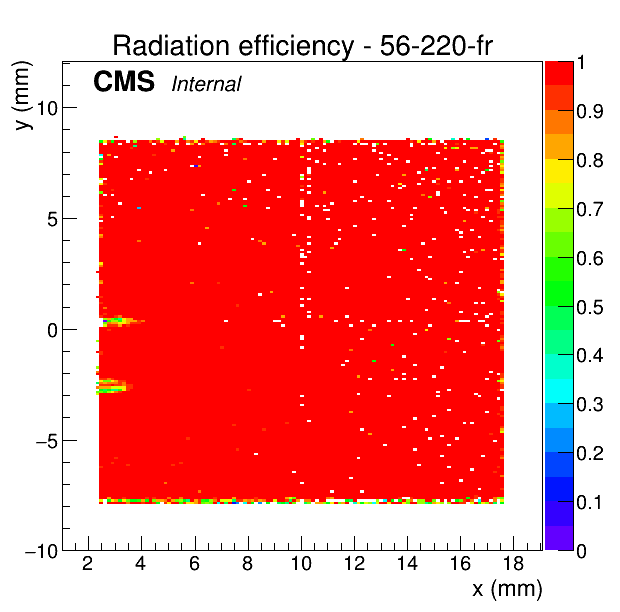

In [24]:
sector = '56'
station = '2'
c = makeRadiationEfficiencyPlot(rootFile,sector,station,True)
c.Draw()